# Blurring and Smoothing

[based on https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html]


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [21]:
img = cv2.imread('data/openCV-logo.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

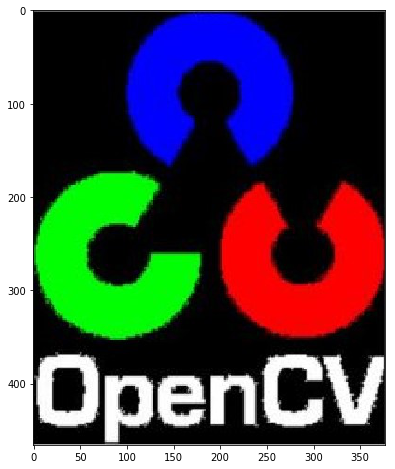

In [22]:
plt.imshow(img)

-------

### Low Pass Filter with a 2D Convolution


### Create the Kernel

In [23]:
kernel = np.ones(shape=(8,8),dtype=np.float32)/25

In [24]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


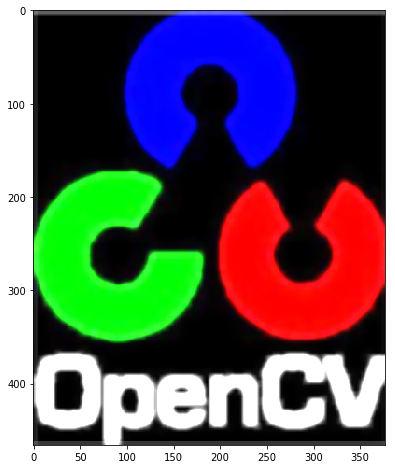

In [25]:
dst = cv2.filter2D(img,-1,kernel)
plt.imshow(dst)

* Exercise: modify the kernel and run the script again. What happened?

## Averaging

In [26]:
blurred_img = cv2.blur(img,ksize=(5,5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


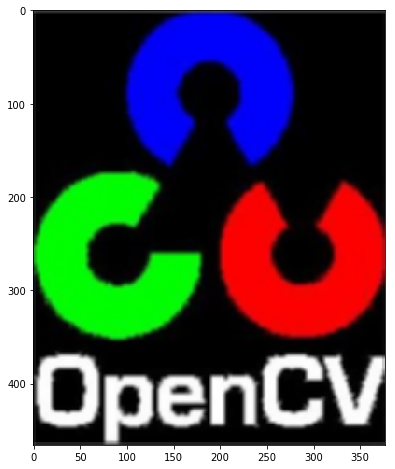

In [27]:
plt.imshow(blurred_img)

## Gaussian Blurring

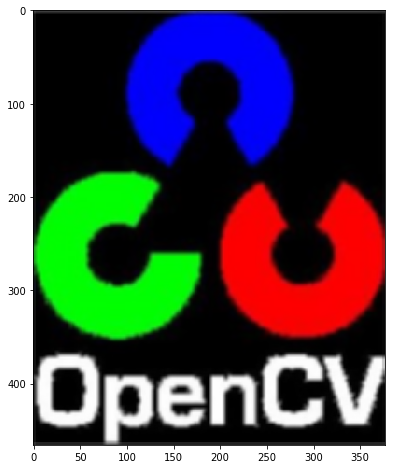

In [28]:
blurred_img = cv2.GaussianBlur(img,(5,5),10)
plt.imshow(blurred_img)

## Median Blurring

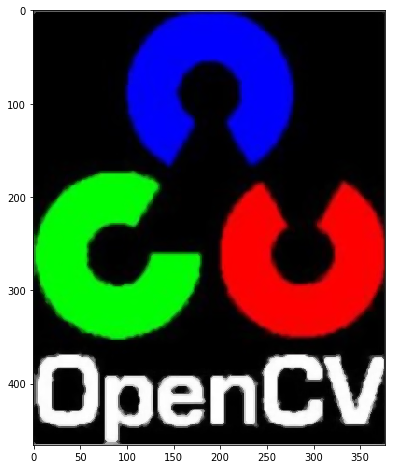

In [29]:
median = cv2.medianBlur(img,5)
plt.imshow(median)

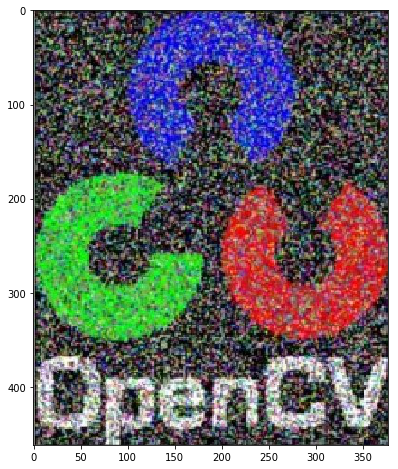

In [30]:
img = cv2.imread('data/openCV-noisy-logo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

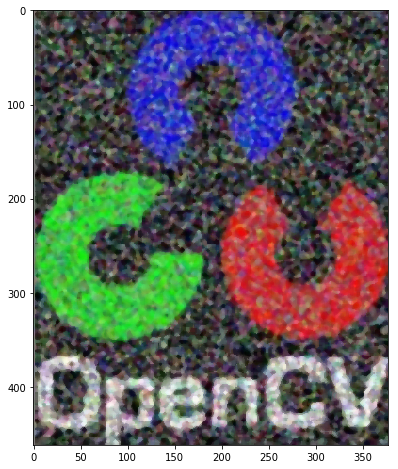

In [31]:
median = cv2.medianBlur(img,5)
plt.imshow(median)

## Bilateral Filtering

In [32]:
blur = cv2.bilateralFilter(img,9,75,75)

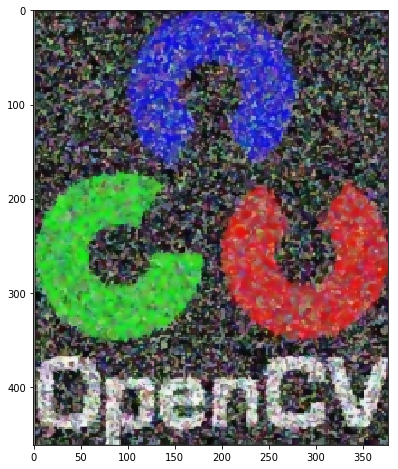

In [33]:
plt.imshow(blur)

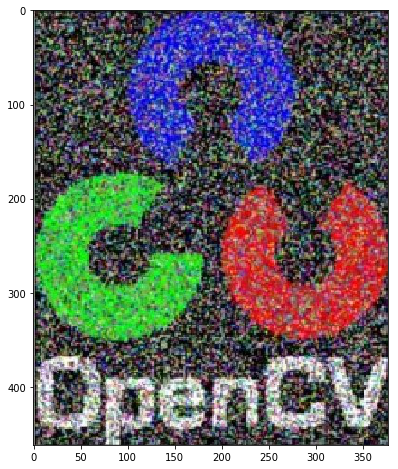

In [34]:
plt.imshow(img)

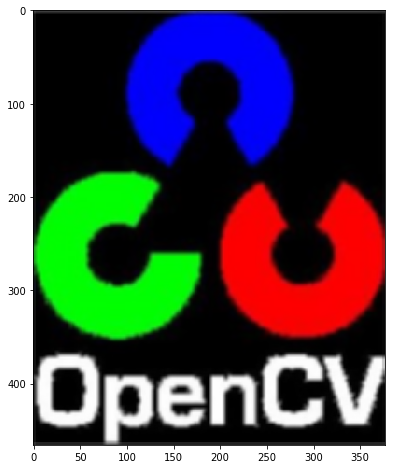

In [35]:
blur = cv2.GaussianBlur(img,(5,5),10)
plt.imshow(blurred_img)

# * Why the median filters didn't work for this type of noise but GaussianBlur did?

# Morphological Operators

[based on https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html]

* EROSION

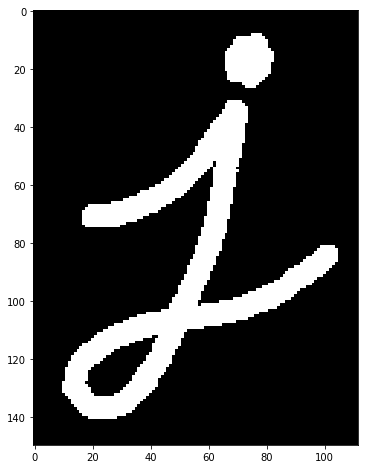

In [66]:
img = cv2.imread('data/j.png',cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')

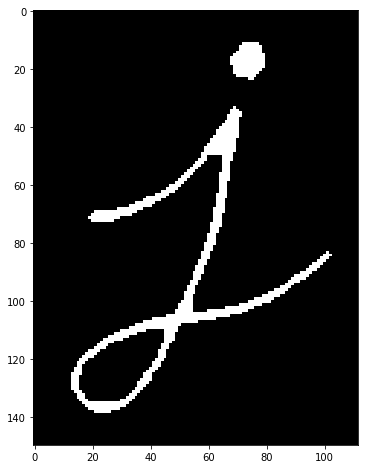

In [68]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion1,cmap='gray')

* Change the number of iterations. What happened?

* Change the size of the kernel.

* DILATION

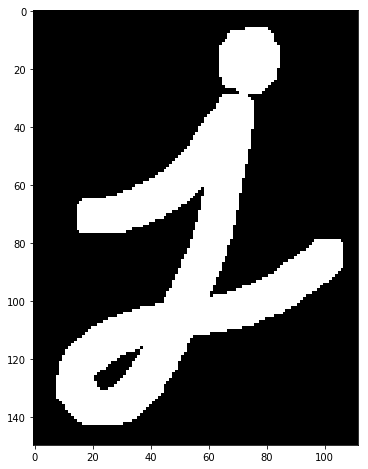

In [69]:
dilated = cv2.dilate(img, kernel, iterations = 1)
plt.imshow(dilated,cmap='gray')

In [56]:
type(img)

numpy.ndarray

In [70]:
img.shape

(150, 112)

* ADDING BLACK NOISE AND WHITE NOISE

In [80]:
white_noise = np.random.randint(low = 0, high = 2, size = (150,112))

In [81]:
white_noise

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1]])

In [82]:
white_noise = white_noise*255

In [83]:
white_noise.shape

(150, 112)

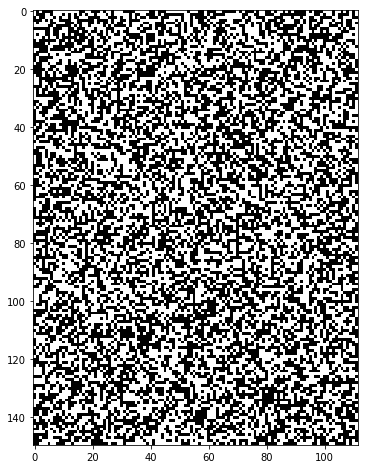

In [84]:
WN_img = img + white_noise
plt.imshow(WN_img,cmap='gray')

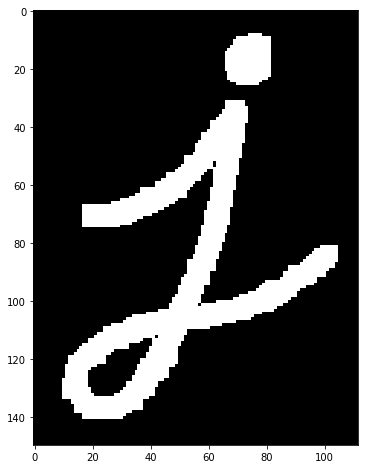

In [86]:
opening = cv2.morphologyEx(WN_img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

# WOW! Would that work the same with Black noise????

In [87]:
black_noise = white_noise*(-1)

In [88]:
black_noise

array([[-255,    0, -255, ..., -255,    0, -255],
       [-255,    0,    0, ..., -255,    0, -255],
       [   0, -255,    0, ..., -255,    0,    0],
       ...,
       [   0,    0, -255, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -255,    0],
       [   0,    0, -255, ...,    0, -255, -255]])

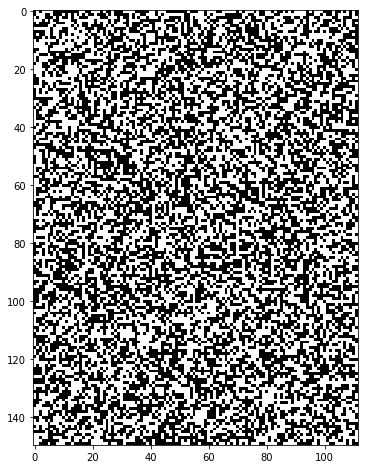

In [89]:
BN_img = img + black_noise
plt.imshow(BN_img,cmap='gray')

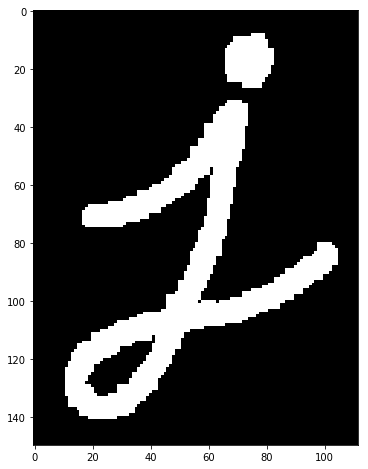

In [90]:
opening2 = cv2.morphologyEx(BN_img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening2,cmap='gray')

* CLOSING

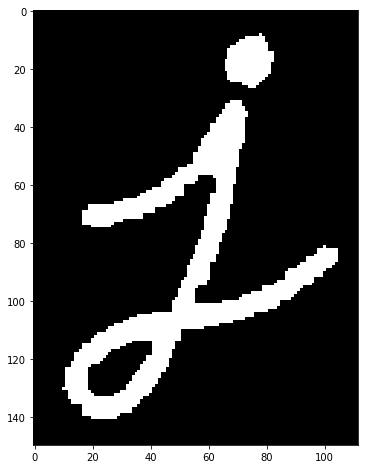

In [91]:
closing = cv2.morphologyEx(BN_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

* Morphological gradient: dilation - erosion

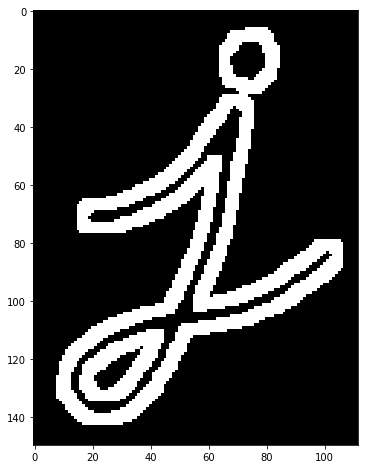

In [92]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient,cmap='gray')